# EDA and Plotting

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

<mark>Jump right into analyses from here:</mark>

[Counting values from individual registrations](#1)  
[Counting values from team registrations](#2)

## Individual registrations
<a id =1> </a>

<font color=#330099>Read in the csv from the repo</font>

In [ ]:
individualDF = pd.read_csv("./data/CR_individual.csv", index_col="ID")

<font color=#330099>Some summary</font>

In [ ]:
individualDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 16 to 252
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Country                                                  204 non-null    object
 1   Affiliation or university                                204 non-null    object
 2   Academic discipline                                      186 non-null    object
 3   Career stage / position                                  186 non-null    object
 4   How did you find out about this workshop?                183 non-null    object
 5   Attendance/participation type                            204 non-null    object
 6   Stream only or also exercise group? Video or in-person?  204 non-null    object
 7   Which days you plan to attend?                           204 non-null    object
 8   Registration date                      

<font color=#330099>A closer look</font>

In [ ]:
individualDF.head(2)

,Country,Affiliation or university,Academic discipline,Career stage / position,How did you find out about this workshop?,Attendance/participation type,Stream only or also exercise group? Video or in-person?,Which days you plan to attend?,Registration date,Registration state
ID,,,,,,,,,,
16,Norway,UiT The Arctic University of Norway,Chemical Sciences,Research software engineer,Another event,Organizer,I am an organizer or instructor or observer,"Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu,...",2022-07-04 07:35:21.871298+00:00,Completed
17,Sweden,Chalmers University of Technology,Mechanical Engineering,Researcher,CodeRefinery.org; Educational institute,Learner,Watching stream and participate in online exer...,"Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu,...",2022-07-04 08:57:15.110384+00:00,Completed


<font color=#330099>Count some values</font>

In [ ]:
countCountries = individualDF["Country"].value_counts()
countOrganisations = individualDF["Affiliation or university"].value_counts()
countAcademic = individualDF["Academic discipline"].value_counts()
countCareer = individualDF["Career stage / position"].value_counts()
countFindOut = individualDF["How did you find out about this workshop?"].value_counts()
countAttendaceType1 = individualDF["Attendance/participation type"].value_counts()
countAttendaceType2 = individualDF["Stream only or also exercise group? Video or in-person?"].value_counts()
countAttendaceDays = individualDF["Which days you plan to attend?"].value_counts()

### Country

<font color=#330099>This can be plotted right away</font>

In [ ]:
countCountries

Finland              61
Sweden               50
Norway               38
Spain                12
Denmark               7
Netherlands           5
India                 4
Ireland               3
Switzerland           3
United Kingdom        3
Italy                 3
France                2
United States         2
Trinidad & Tobago     1
Singapore             1
China                 1
Thailand              1
Greece                1
Iran                  1
Turkey                1
Brazil                1
Indonesia             1
Germany               1
Canada                1
Name: Country, dtype: int64

In [63]:
countCountries_DF = countCountries.reset_index()

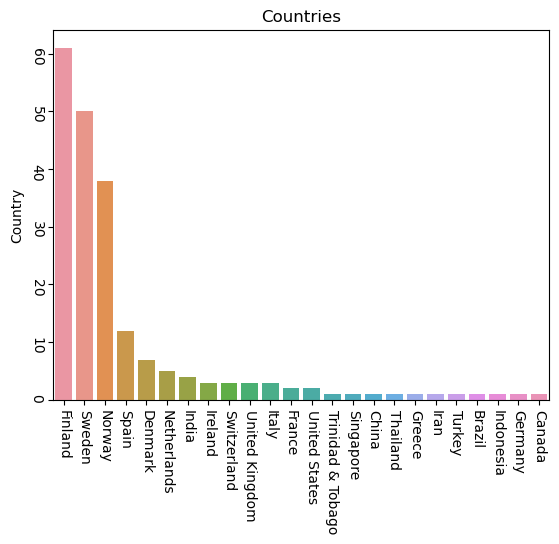

In [77]:
ax = sns.barplot(x=countCountries_DF.index, y=countCountries_DF.Country, data=countCountries_DF)
ax.set(title="Countries")
ax.set_xticklabels(countCountries.index)
ax.tick_params(labelrotation = 270)

### Affiliation or university

<font color=#ff0000>This has some names with slight variations so needs handling</font>

In [96]:
countOrganisations

Aalto University                                         32
NTNU                                                     10
Uppsala University                                        9
SMHI                                                      9
University of Oslo                                        6
                                                         ..
Norwegian University of Science and Technology (NTNU)     1
Justervesenet-Norwegian Metrology Service                 1
University of South Eastern Norway                        1
Technical University of Chalmers                          1
UiO                                                       1
Name: Affiliation or university, Length: 107, dtype: int64

### Academic discipline

<font color=#330099>This can be plotted right away</font>

In [81]:
countAcademic_DF = countAcademic.reset_index()

In [ ]:
countAcademic_DF

,index,Academic discipline
0,Computer and Information Sciences,31
1,Physical Sciences,28
2,Biological Sciences,22
3,Chemical Sciences,18
4,Earth and Related Environmental Sciences,15
5,"Electrical Engineering, Electronic Engineering...",14
6,Mechanical Engineering,13
7,Civil Engineering,8
8,Health Sciences,6
9,Psychology,4


<font color=#ff0000>This does not quite do what I wanted</plot>

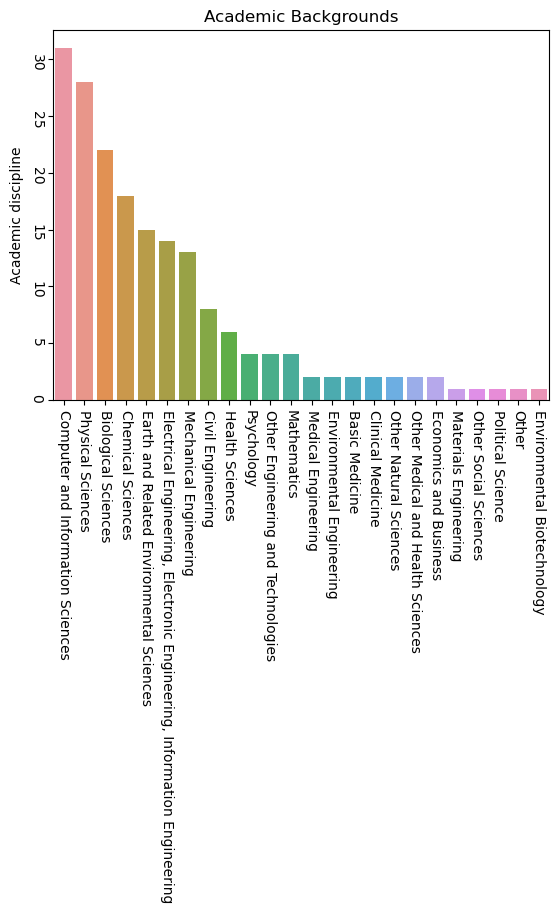

In [85]:
ax = sns.barplot(x=countAcademic_DF.index, y=countAcademic_DF["Academic discipline"], data=countAcademic_DF)
ax.set(title="Academic Backgrounds")
ax.set_xticklabels(countAcademic.index)
ax.tick_params(labelrotation = 270)

### Career stage / position

<font color=#330099>This can be plotted right away</font>

In [86]:
countCareer_DF = countCareer.reset_index()

In [ ]:
countCareer_DF

,index,Career stage / position
0,Graduate student,72
1,Researcher,37
2,Postdoc,26
3,Research software engineer,17
4,Other,12
5,Professor,9
6,Industry,8
7,Undergrad. student,5


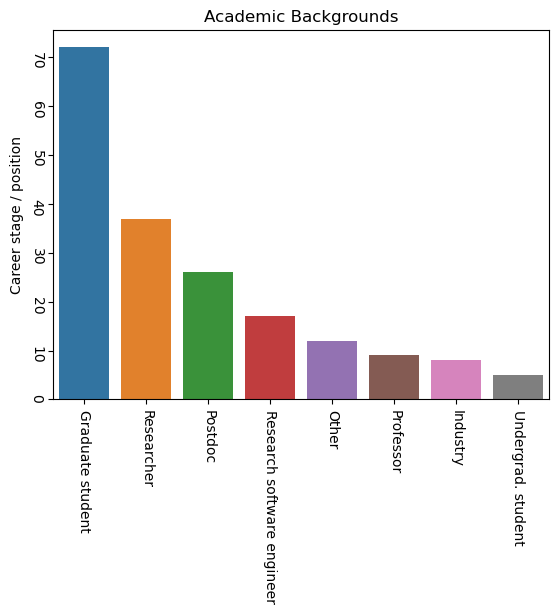

In [89]:
ax = sns.barplot(x=countCareer_DF.index, y=countCareer_DF["Career stage / position"], data=countCareer_DF)
ax.set(title="Academic Backgrounds")
ax.set_xticklabels(countCareer.index)
ax.tick_params(labelrotation = 270)

### How did you find out about this workshop?

<font color=#ff0000>This needs some text analysis</font>

In [99]:
countFindOut

Friend / Colleague                                                                   67
Educational institute                                                                34
CodeRefinery.org                                                                     19
National HPC center                                                                  18
Another event                                                                        15
Twitter                                                                              15
CodeRefinery.org; Educational institute                                               2
Educational institute; Friend / Colleague                                             2
CodeRefinery.org; National HPC center; Friend / Colleague                             1
Twitter; Another event                                                                1
Friend / Colleague; Another event                                                     1
Educational institute; National 

### Attendance/participation type

<font color=#330099>This can be plotted right away</font>

In [100]:
countAttendaceType1

Learner            185
Instructor           6
Observer             5
Organizer            3
Expert helper        3
Exercise leader      2
Name: Attendance/participation type, dtype: int64

### Stream only or also exercise group? Video or in-person?

<font color=#330099>This can be plotted right away</font>

In [101]:
countAttendaceType2

Only watching the stream                                                         90
Watching stream and participate in online exercise group (Code Refinery Zoom)    62
I would like to get more information and decide later                            29
I would like to watch and exercise with others in-person                         14
I am an organizer or instructor or observer                                       9
Name: Stream only or also exercise group? Video or in-person?, dtype: int64

### Which days you plan to attend?

<font color=#ff0000>This is tricky and potentially not worth it.</font>
> It would be nice to know if the days have some differences. Probably we get that from the Twitch stats also

In [102]:
countAttendaceDays

Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu, Sep 22 (Day 3); Tue, Sep 27 (Day 4); Wed, Sep 28 (Day 5); Thu, Sep 29 (Day 6)                                                        117
Not sure I can attend, but please keep me informed                                                                                                                                   19
Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu, Sep 22 (Day 3); Tue, Sep 27 (Day 4); Wed, Sep 28 (Day 5); Thu, Sep 29 (Day 6); Not sure I can attend, but please keep me informed     11
Tue, Sep 27 (Day 4); Wed, Sep 28 (Day 5); Thu, Sep 29 (Day 6)                                                                                                                         8
Tue, Sep 20 (Day 1); Wed, Sep 21 (Day 2); Thu, Sep 22 (Day 3)                                                                                                                         6
Wed, Sep 21 (Day 2); Thu, Sep 22 (Day 3); Tue, Sep 27 (Day 4); Wed, Sep 28 (Day 

## Team registrations
<a id =2> </a>

<font color=#330099>Read in the csv from the repo</font>

In [105]:
teamDF = pd.read_csv("./data/CR_teams.csv", index_col="ID")

<font color=#330099>Some summary</font>

In [106]:
teamDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 41 to 253
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Affiliation                                                          8 non-null      object 
 1   Actual number of teams                                               6 non-null      float64
 2   Actual number of learners                                            6 non-null      float64
 3   Actual number of exercise leads                                      6 non-null      float64
 4   Country/countries that learners are affilated with                   6 non-null      object 
 5   Career stage/ position of learners                                   6 non-null      object 
 6   Academic discipline                                                  6 non-null      object 
 7   Academic 

<font color=#330099>A closer look</font>

In [107]:
teamDF.head(2)

,Affiliation,Actual number of teams,Actual number of learners,Actual number of exercise leads,Country/countries that learners are affilated with,Career stage/ position of learners,Academic discipline,Academic disciplines (if multiple teams from different disciplines),Registration date,Registration state
ID,,,,,,,,,,
41,TU Delft Library,4.0,19.0,5.0,TU Delft: 19,"PhD candidate: 17, Researcher: 2",Mixed,"Civil Engineering: 5, Computer and Information...",2022-07-11 11:27:26.901868+00:00,Completed
42,University of Jyväskylä,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-11 12:25:35.330445+00:00,Completed


<font color=#330099>Count some values</font>

In [108]:
countActualTeams_team = teamDF["Actual number of teams"].value_counts()
countActualLearners_team = teamDF["Actual number of learners"].value_counts()
countActualELs_team = teamDF["Actual number of exercise leads"].value_counts()

In [109]:
countActualTeams_team

1.0    4
4.0    1
2.0    1
Name: Actual number of teams, dtype: int64

In [110]:
countActualLearners_team

5.0     2
19.0    1
12.0    1
2.0     1
4.0     1
Name: Actual number of learners, dtype: int64

In [111]:
countActualELs_team

2.0    4
5.0    1
1.0    1
Name: Actual number of exercise leads, dtype: int64